In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

importing the dataset to the dataframe

In [6]:
data = pd.read_csv(r"C:\Users\G.Sreenivasulu\ABHI\loan_approval_project\dataset\03_EDA_dataset.csv")

CALCULATING EMI-to-INCOME ratio

In [7]:
#monthly income
data['monthly_income']=round(data['income_annum']/12 ,2)
#CONSIDERING AN INTEREST RATE OF 5% annualy
rate_monthly =0.05/12
#converting loan_term from monthly to annum
loan_monthly = data['loan_term'] *12
#calculating the EMI
principle = data['loan_amount']

data['emi'] = principle * rate_monthly * (1 + rate_monthly)**loan_monthly / ((1 + rate_monthly)**loan_monthly - 1)
data['emi-to-income'] = data['emi']/data['monthly_income']
round(data['emi-to-income'] ,2)

0       0.35
1       0.45
2       0.26
3       0.57
4       0.20
        ... 
4264    0.26
4265    0.27
4266    0.31
4267    0.47
4268    0.41
Name: emi-to-income, Length: 4269, dtype: float64

if emi-to-income ratio is 0.35, it means that 35% of income goes to emi

In [8]:
data.groupby('loan_status')['emi-to-income'].mean()

loan_status
Approved    0.575506
Rejected    0.422628
Name: emi-to-income, dtype: float64

From the above output, though a person's 57% of income goes to EMI, the loan is approved. This is a bit risky. But it is backed up by the fact that the loan approvals are driven by the credit score.

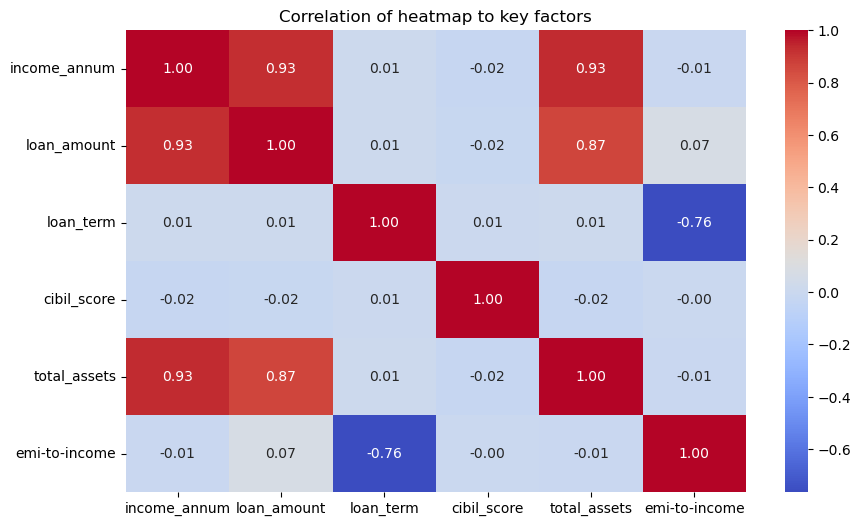

In [9]:
features = ['income_annum','loan_amount', 'loan_term', 'cibil_score','total_assets','emi-to-income']
corr=data[features].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,fmt='.2f',cmap="coolwarm")
plt.title("Correlation of heatmap to key factors")
plt.show()

The above heatmap shows correlation between factors

In [10]:
FACTORS =["CIBIL Score","Annual Income","Total Assets","Loan Amount","Loan Term","EMI-to-Income Ratio","Employment and Education"]
OBSERVATIONS = [ "Strongest predictor of approval","Weak differentiator","Moderate positive impact","Higher amounts slightly increase rejection","Longer terms are riskier","Not enough alone","Minimal impact on approval"]
summary = pd.DataFrame({"Factor": FACTORS,"Key Observation": OBSERVATIONS })

summary


,Factor,Key Observation
0,CIBIL Score,Strongest predictor of approval
1,Annual Income,Weak differentiator
2,Total Assets,Moderate positive impact
3,Loan Amount,Higher amounts slightly increase rejection
4,Loan Term,Longer terms are riskier
5,EMI-to-Income Ratio,Not enough alone
6,Employment and Education,Minimal impact on approval


In [11]:
data.to_csv(r"C:\Users\G.Sreenivasulu\ABHI\loan_approval_project\dataset\04_Summary_dataset.csv")